In [202]:
import os
import pandas as pd

In [203]:
from unicodedata import normalize

# データ読み込み

In [204]:
lyrics = {}
for file in os.listdir("data"):
    if file == ".DS_Store":
        continue
    title = file.replace("BUMP OF CHICKEN - ", "").replace(".txt", "")
    title = normalize("NFC", title)
    with open("data/" + file) as r:
        lyrics[title] = "".join(r.readlines()[5:])

In [205]:
df = pd.DataFrame([[k, v] for k, v in lyrics.items()], columns=['title', 'lyric'])

In [206]:
df.head()

title                                              lyric
0      リボン  \n嵐の中をここまで来たんだ　嵐の中をここまで来たんだ\n出会って生まれた光　追いかけて\n...
1     友達の唄  \nあなたが大きくなるまでに　雨の日なんて何度もある\nその中の一度は一緒に濡れた事　忘れち...
2     シリウス  \n約束をしただろう 遥かな どこか いつか\n名前さえ忘れても 消えない灯火\n\n息をす...
3   話がしたいよ  \n持て余した手を　自分ごとポケットに隠した\nバスが来るまでの間の　おまけみたいな時間\n...
4  Opening  \nお訪ねします\nこの辺りで ついさっき\n涙の落ちる音が聴こえた気がして\n駆けつけたん...

In [207]:
df.shape

(128, 2)

# マスター

In [231]:
albums = {
    "FLAME_VEIN": ["ガラスのブルース", "くだらない唄", "アルエ", "リトルブレイバー", "ノーヒットノーラン", "とっておきの唄", "ナイフ", "バトルクライ"],
    "THE LIVING DEAD": ["Opening", "グングニル", "ベストピクチャー", "続・くだらない唄", "ランプ", "K", "リリィ", "Ever lasting lie", "グロリアスレボリューション", "Ending"],
    "jupiter": ["Stage of the ground", "天体観測", "Title of mine", "キャッチボール", "ハルジオン", "ベンチとコーヒー", "メロディーフラッグ", "ベル", "ダイヤモンド", "ダンデライオン", "Stage of the ground", "天体観測", "ハルジオン", "メロディーフラッグ", "ダイヤモンド", "バイバイ、サンキュー"],
    "ユグドラシル": ["asgard", "オンリーロンリーグローリー", "乗車権", "ギルド", "embrace", "sailing day", "同じドアをくぐれたら", "車輪の唄", "スノースマイル", "レム", "fire sign", "太陽", "ロストマン", "midgard"],
    "orbital period": ["voyager", "星の鳥", "メーデー", "才悩人応援歌", "プラネタリウム", "supernova", "ハンマーソングと痛みの塔", "時空かくれんぼ", "かさぶたぶたぶ", "花の名", "ひとりごと", "飴玉の唄", "星の鳥 reprise", "カルマ", "arrows", "涙のふるさと", "flyby"],
    "present from you": ["ラフ・メイカー", "バイバイサンキュー", "彼女と星の椅子", "ホリデイ", "Ever lasting lie (Acoustic Version)", "睡眠時間", "夢の飼い主", "スノースマイル 〜ringing version〜", "銀河鉄道", "真っ赤な空を見ただろうか", "東京賛歌", "ガラスのブルース (28 years round)", "プレゼント"],
    "COSMONAUT": ["三ッ星カルテット", "R.I.P.", "ウェザーリポート", "分別奮闘記", "モーターサイクル", "透明飛行船", "魔法の料理 ～君から君へ～", "HAPPY", "66号線", "セントエルモの火", "angel fall", "宇宙飛行士への手紙", "イノセント", "beautiful glider"],
    "RAY": ["WILL", "虹を待つ人", "ray", "サザンクロス", "ラストワン", "morning glow", "ゼロ", "トーチ", "Smile", "firefly", "white note", "友達の唄", "(please) forgive", "グッドラック"],
    "Butterflies": ["GO", "Hello,world!", "Butterfly", "流星群", "宝石になった日", "コロニー", "パレード", "大我慢大会", "孤独の合唱", "You were here", "ファイター"],
    "aurora arc": ["aurora arc", "月虹", "Aurora", "記念撮影", "ジャングルジム", "リボン", "シリウス", "アリア", "話がしたいよ", "アンサー", "望遠のマーチ", "Spica", "新世界", "流れ星の正体"]
}

# 前処理

In [209]:
song_album_map = {}
for album, songs in albums.items():
    for song in songs:
        song_album_map[song] = album

## アルバム紐付け

In [210]:
df['album'] = df['title'].map(song_album_map)

In [211]:
df.head()

title                                              lyric            album
0      リボン  \n嵐の中をここまで来たんだ　嵐の中をここまで来たんだ\n出会って生まれた光　追いかけて\n...       aurora arc
1     友達の唄  \nあなたが大きくなるまでに　雨の日なんて何度もある\nその中の一度は一緒に濡れた事　忘れち...              RAY
2     シリウス  \n約束をしただろう 遥かな どこか いつか\n名前さえ忘れても 消えない灯火\n\n息をす...       aurora arc
3   話がしたいよ  \n持て余した手を　自分ごとポケットに隠した\nバスが来るまでの間の　おまけみたいな時間\n...       aurora arc
4  Opening  \nお訪ねします\nこの辺りで ついさっき\n涙の落ちる音が聴こえた気がして\n駆けつけたん...  THE LIVING DEAD

In [212]:
df[df['album'].isnull()]

title                                              lyric album
15      ハイブリッド レインボウ  \nほとんど沈んでるみたいな無人島\n地球儀にのってない名前もない\n昨日は近くまで希望の船...   NaN
17                いか  \n君の肌はとても白くて 見とれてしまうぜ\n太陽の下で輝いてるね 誰もかなわない\n\nこ...   NaN
21            pinkie  \n未来の私が笑ってなくても　あなたとの今を覚えてて欲しい\n\n心の始まりは強すぎて　言葉...   NaN
36             ディアマン  \n怖がりな少年　どんどんギターを歪ませた\n他人は少しも　解ってくれなかった\n5Wのアン...   NaN
41   Merry Christmas  \n嬉しそうな並木道を　どこへ向かうの\nすれ違う人は皆　知らない顔で\n\n街はまるでおも...   NaN
50              歩く幽霊  \nどんな具合だい まだやれそうかい 慎重に点検して 考えて\n壊れたところ 直せそうなとこ...   NaN
54                 柿  \n庭のすみに 僕の柿の木\n種から育てた 僕の柿の木\n\n柿の実なるかな たくさんなるか...   NaN
72      good friends  \n比較対照探しの毎日 知り合っても 知らなくても\n知識 苦労 資格 今あいつは 人として...   NaN
78           ほんとのほんと  \n尖った言葉がいくつか　壁にぶつかって　転がって冷えた\nざわついたまま　静かになって　時...   NaN
98             キャラバン  \n随分先に行ってしまった 光の下のキャラバン\n\nトンネルに残響 塞いだ耳 自分嫌いな自...   NaN
103     スターダストダンスホール  \nAh~Ya~ 星降る夜\nAh~Ya~ 腰振るよ\nこのメロディーが 響き渡れば\nそこ...   NaN
113            おるすばん  \n食べたいな 世界中の珍しい食べ物\nムシャリ ムシャ モグリ モグ\nきっと きっと 美...   NaN

## 今回はアルバム曲に絞る

In [213]:
df = df[df['album'].notnull()].reset_index()

In [214]:
df.head()

index    title                                              lyric  \
0      0      リボン  \n嵐の中をここまで来たんだ　嵐の中をここまで来たんだ\n出会って生まれた光　追いかけて\n...   
1      1     友達の唄  \nあなたが大きくなるまでに　雨の日なんて何度もある\nその中の一度は一緒に濡れた事　忘れち...   
2      2     シリウス  \n約束をしただろう 遥かな どこか いつか\n名前さえ忘れても 消えない灯火\n\n息をす...   
3      3   話がしたいよ  \n持て余した手を　自分ごとポケットに隠した\nバスが来るまでの間の　おまけみたいな時間\n...   
4      4  Opening  \nお訪ねします\nこの辺りで ついさっき\n涙の落ちる音が聴こえた気がして\n駆けつけたん...   

             album  
0       aurora arc  
1              RAY  
2       aurora arc  
3       aurora arc  
4  THE LIVING DEAD

## メタ情報を削除

In [215]:
trims = [
    "\n", "/", " ", " ", "　"
]
for trim in trims:
    df['lyric'] = df['lyric'].str.replace(trim, "")

# ワードクラウド

In [ ]:
def split_into_words(doc):
    mecab = MeCab.Tagger("-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
    lines = mecab.parse(doc).splitlines()
    words = []
    for line in lines:
        chunks = line.split('\t')
        if len(chunks) > 3 and (chunks[3].startswith('動詞') or chunks[3].startswith('形容詞') or (chunks[3].startswith('名詞') and not chunks[3].startswith('名詞-数'))):
            words.append(chunks[0])
    return words

In [20]:
doc = df.head(1)['lyric'].values[0]

In [22]:
import MeCab
mecab = MeCab.Tagger("-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")

In [33]:
def split_into_words(doc):
    lines = mecab.parse(doc).splitlines()
    words = []
    for line in lines:
        chunks = line.split('\t')
        word = chunks[0]
        if word == "EOS":
            continue
        parts_of_speech = chunks[3]
        positive_cond = parts_of_speech.startswith('動詞') or parts_of_speech.startswith('形容詞') or parts_of_speech.startswith('名詞')
        negative_cond = parts_of_speech.startswith('名詞-数')
        if positive_cond and not negative_cond:
            words.append(word)
    return words

## 全体

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (16, 4)
plt.rcParams["font.family"] = "IPAexGothic"

In [34]:
fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

In [74]:
def plot_wordcloud(words, title):
    wordcloud_gen = WordCloud(background_color="white", width=900, height=500, font_path=fpath, stopwords=stop_words)
    wordcloud = wordcloud_gen.generate(" ".join(words))
    
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(wordcloud)
    [spine.set_visible(False) for spine in ax.spines.values()]

    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
    ax.set_title(f'{title}', fontsize=20)

In [60]:
doc = "".join(df['lyric'].values)
words = split_into_words(doc)

In [68]:
stop_words = [
    "いる", "なっ", "よう", "それ", "ある", "ない", "いい", "てる", "する", "くれ", "いく", "もの", "まま", "なる"
]

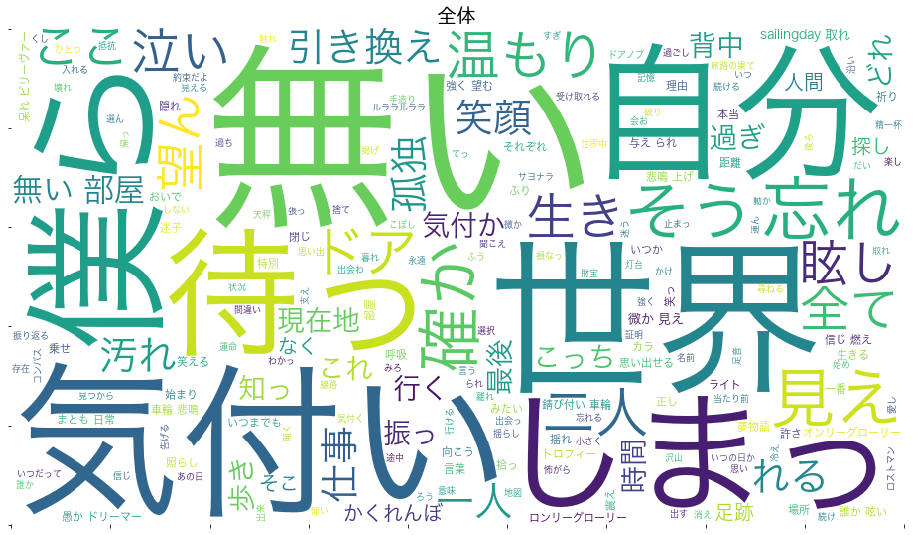

In [75]:
plot_wordcloud(words, "全体")

## アルバムごと

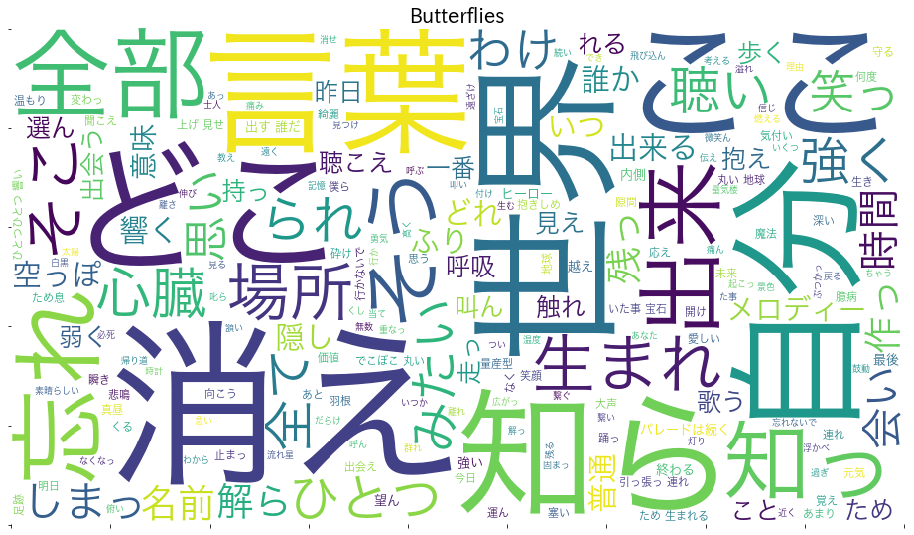

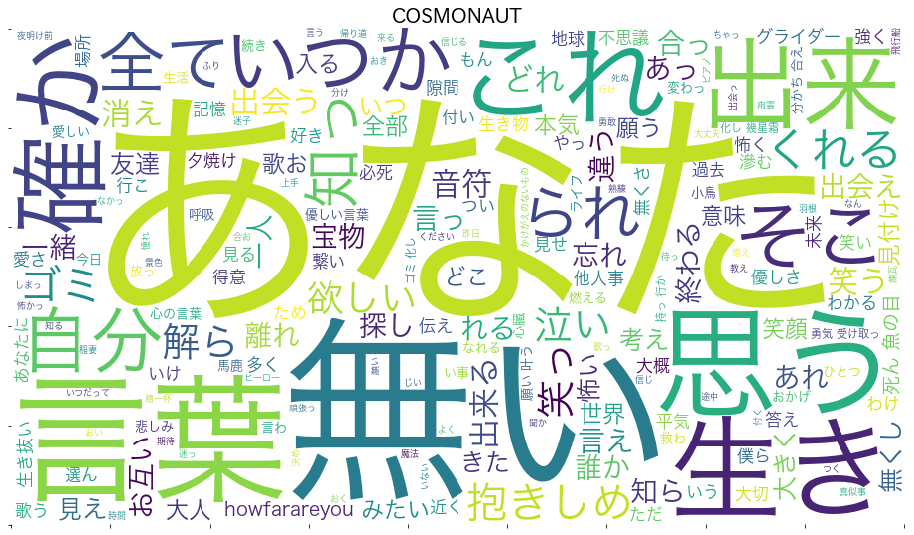

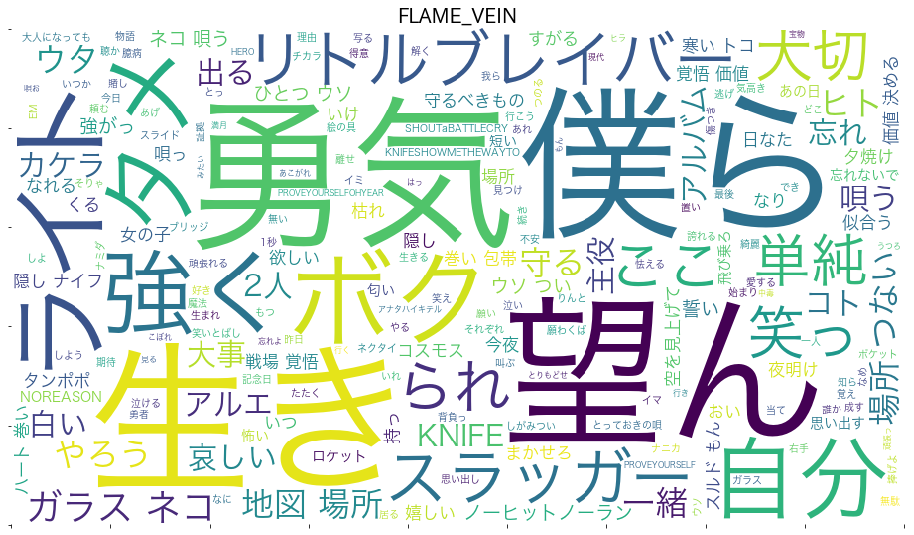

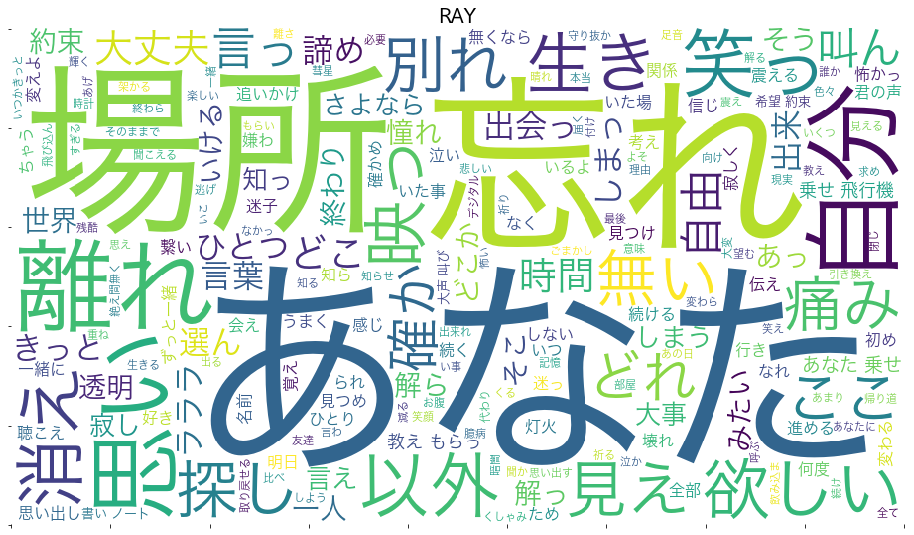

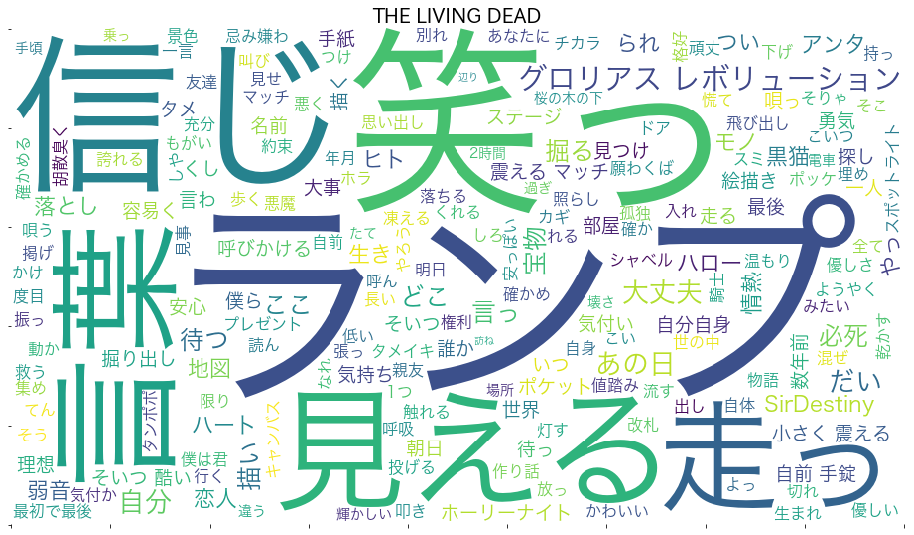

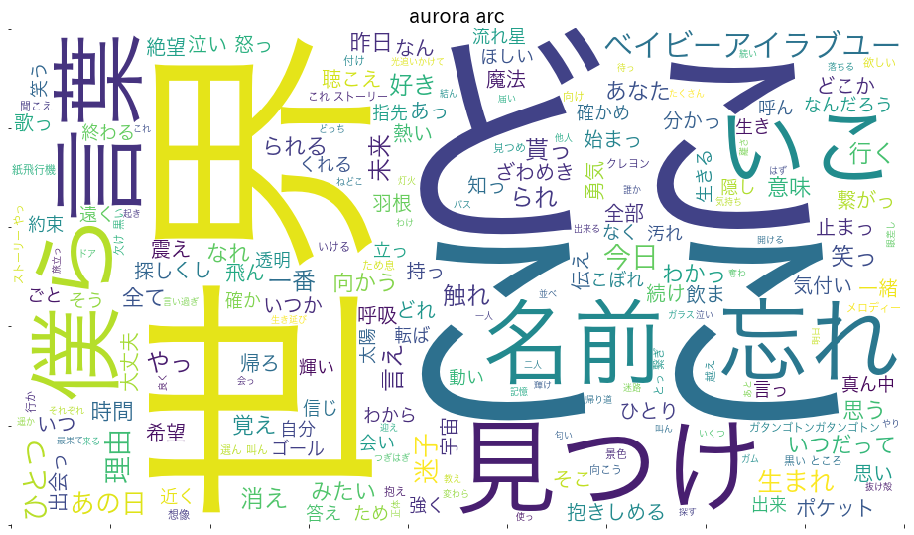

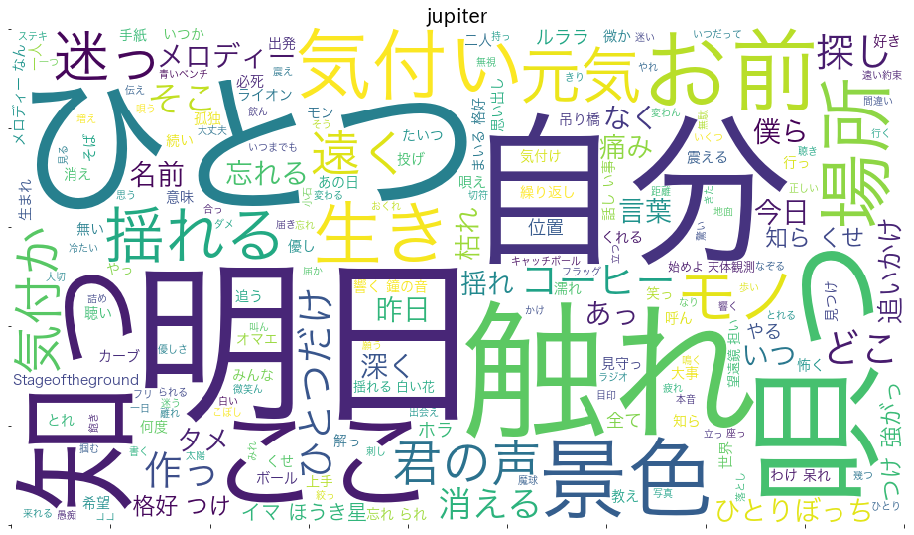

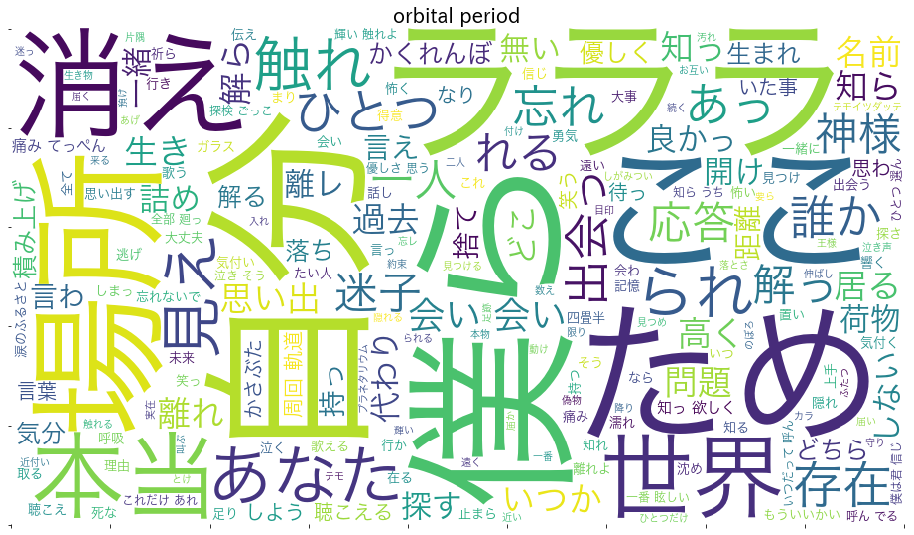

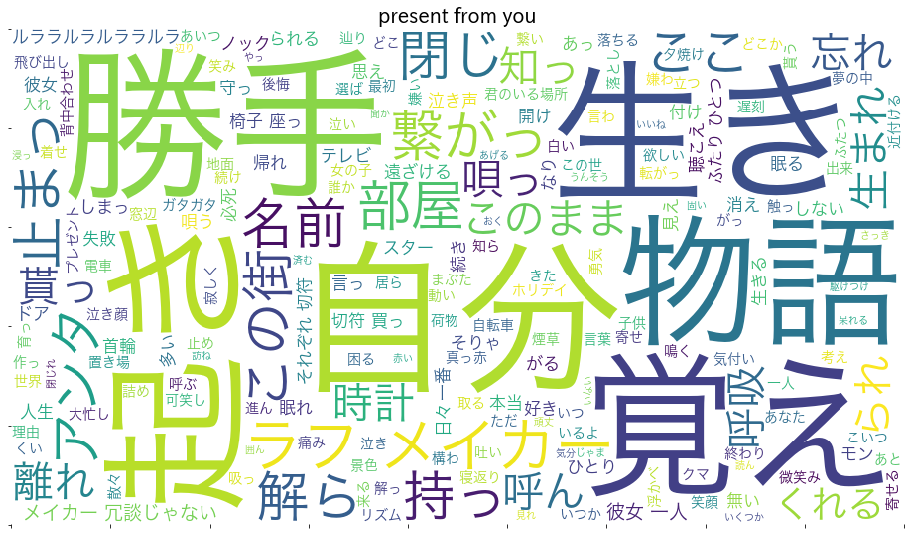

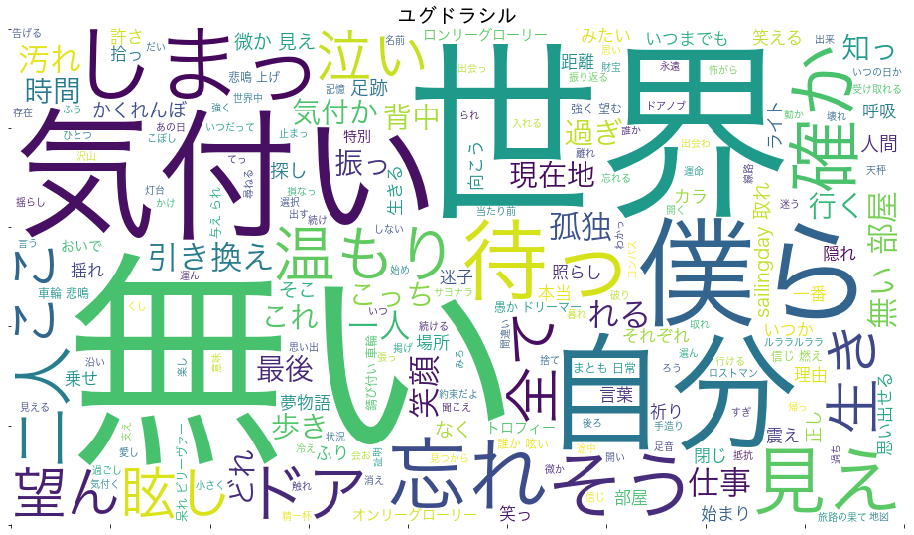

In [76]:
for album, dfalbum in df.groupby("album"):
    doc = "".join(dfalbum['lyric'].values)
    words = split_into_words(doc)
    plot_wordcloud(words, album)

In [250]:
for a in albume_names:
    print(a)

FLAME_VEIN
THE LIVING DEAD
jupiter
ユグドラシル
orbital period
present from you
COSMONAUT
RAY
Butterflies
aurora arc


# 歌詞の長さ

In [217]:
df['lyric_len'] = df['lyric'].apply(lambda x: len(x))

In [218]:
import seaborn as sns

/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


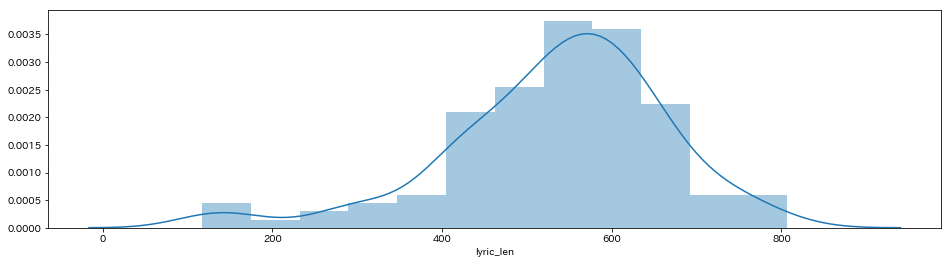

In [219]:
sns.distplot(df['lyric_len'])

In [230]:
sns.violinplot?

Text(0.5,0,'アルバム')

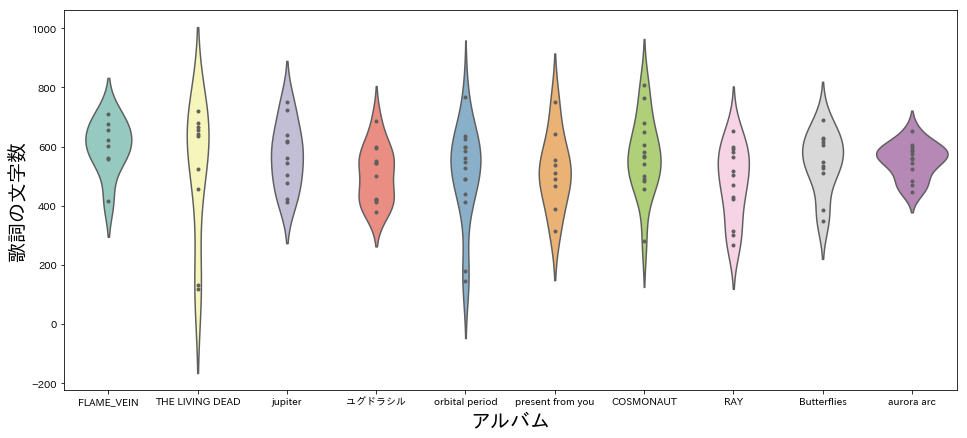

In [241]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1)
ax = sns.violinplot(x=df['album'], y=df['lyric_len'], palette="Set3", inner="points", order=albums)
ax.set_ylabel("歌詞の文字数", fontsize=20)
ax.set_xlabel("アルバム", fontsize=20)

# Doc2Vec＆t-SNE

In [89]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.manifold import TSNE
import numpy as np

In [233]:
albume_names = list(albums.keys())
titles = df['title'].tolist()

In [156]:
sentences = []
for i, row in df.iterrows():
    title = row['title']
    lyric = row['lyric']
    words = split_into_words(lyric)
    td = TaggedDocument(words=words, tags=[title])
    sentences.append(td)

In [146]:
model = Doc2Vec(sentences, dm=0, vector_size=300, window=15, alpha=.025, min_alpha=.025, min_count=1, sample=1e-6)

print('\n訓練開始')
for epoch in range(50):
    print('Epoch: {}'.format(epoch + 1))
    model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)
    model.alpha -= (0.025 - 0.0001) / 19
    model.min_alpha = model.alpha


訓練開始
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50


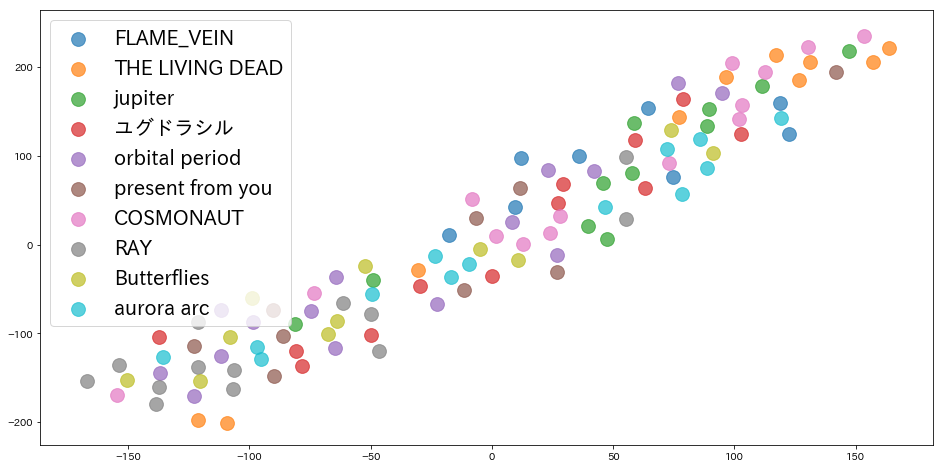

In [249]:
X = np.stack([model.docvecs[title] for title in titles])
X_embedded = TSNE(n_components=2, n_iter=100000, learning_rate=490).fit_transform(X)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)

for i, (album, album_titles) in enumerate(albums.items()):
    album_idx = df[df['title'].isin(album_titles)].index.tolist()
    X_album = X_embedded[album_idx].T
    ax.scatter(X_album[0], X_album[1], cmap=i, label=album, s=190, alpha=0.7)
ax.legend(fontsize=20)